#Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error



sns.set()

# Importing dataset

In [ ]:
# Read in the train and test datasets
train_df = pd.read_csv("https://maxime-devanne.com/datasets/ECG200/ECG200_TRAIN.tsv", sep='\t', header = None)
test_df = pd.read_csv("https://maxime-devanne.com/datasets/ECG200/ECG200_TEST.tsv", sep='\t', header = None)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


In [ ]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.380000,0.708438,1.422151,2.039149,2.126455,1.551616,0.762251,0.282647,0.333630,0.372973,...,0.190412,0.174286,0.205107,0.286484,0.412464,0.459377,0.389852,0.282864,0.182829,0.174863
std,0.929646,0.593513,0.927972,1.046880,1.098754,0.954734,0.963111,1.096712,0.877640,0.761753,...,0.403825,0.434002,0.454395,0.589879,0.772104,0.871045,0.832312,0.665548,0.619799,0.413644
min,-1.000000,-0.706305,-1.100715,-1.321589,-1.076313,-1.247922,-1.482391,-1.598712,-1.508060,-1.609777,...,-0.533503,-0.691436,-0.516631,-0.574304,-0.559178,-0.530917,-0.738019,-0.970796,-1.862314,-1.238622
25%,-1.000000,0.318643,0.779810,1.525548,1.511639,0.966292,0.022470,-0.603378,-0.464767,-0.075355,...,-0.131730,-0.140244,-0.121657,-0.144015,-0.070247,-0.098634,-0.107719,-0.119784,-0.124178,-0.043105
50%,1.000000,0.581008,1.232191,2.152552,2.234408,1.746861,0.574297,0.120230,0.366122,0.457255,...,0.086719,0.089474,0.107957,0.129133,0.170798,0.205220,0.101618,0.136106,0.124148,0.152284
75%,1.000000,0.994760,2.093703,2.707411,2.865394,2.163355,1.502335,1.226563,1.008876,0.990675,...,0.439861,0.468588,0.480635,0.613990,0.588429,0.630966,0.560136,0.594807,0.541680,0.429055
max,1.000000,2.689017,3.535038,3.850263,4.199145,3.720899,3.026452,2.454195,2.220327,2.122435,...,1.376751,1.497244,1.436900,2.190151,3.047309,3.269882,3.332053,2.653741,1.930880,1.372607


# Preprocessing the dataset

## Before Normalization

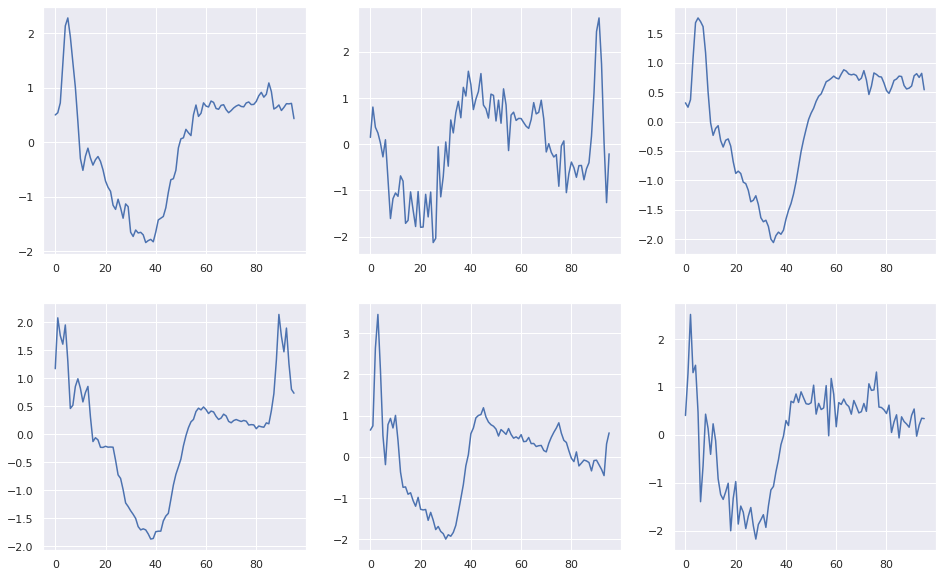

In [ ]:
fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(16, 10))
ax.plot(np.arange(0, len(train_df.iloc[0, 1:])), train_df.iloc[0, 1:])
ax1.plot(np.arange(0, len(train_df.iloc[1, 1:])), train_df.iloc[1, 1:])
ax2.plot(np.arange(0, len(train_df.iloc[2, 1:])), train_df.iloc[2, 1:])
ax3.plot(np.arange(0, len(train_df.iloc[3, 1:])), train_df.iloc[3, 1:])
ax4.plot(np.arange(0, len(train_df.iloc[4, 1:])), train_df.iloc[4, 1:])
ax5.plot(np.arange(0, len(train_df.iloc[5, 1:])), train_df.iloc[5, 1:])

## Min Max Normalization

In [ ]:
min_max_normal_train_df = train_df
min_max_normal_train_df.iloc[:, 1:] = ( train_df.iloc[:, 1:] - np.min(train_df.iloc[:, 1:]) ) / ( np.max(train_df.iloc[:, 1:]) - np.min(train_df.iloc[:, 1:]) )

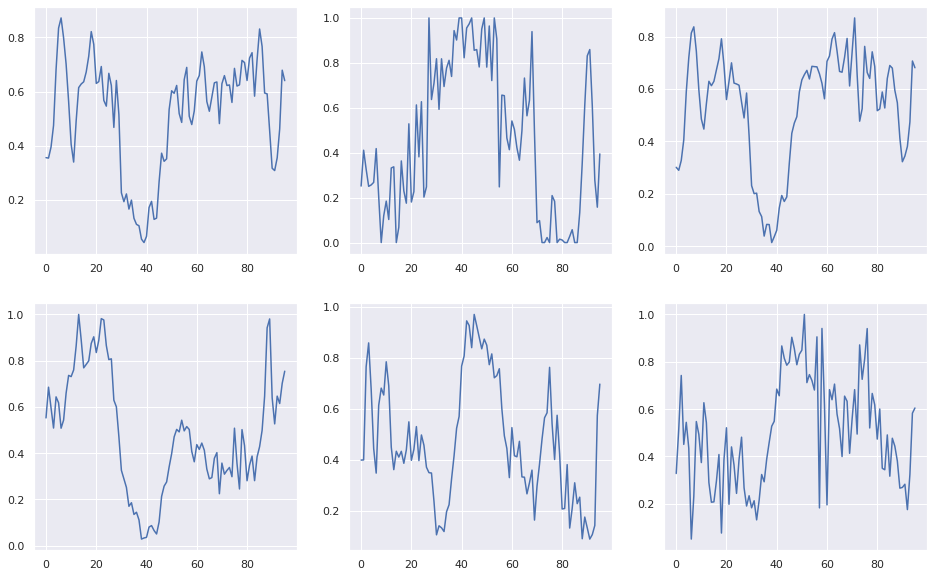

In [ ]:
fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(16, 10))
ax.plot(np.arange(0, len(min_max_normal_train_df.iloc[0, 1:])), min_max_normal_train_df.iloc[0, 1:])
ax1.plot(np.arange(0, len(min_max_normal_train_df.iloc[1, 1:])), min_max_normal_train_df.iloc[1, 1:])
ax2.plot(np.arange(0, len(min_max_normal_train_df.iloc[2, 1:])), min_max_normal_train_df.iloc[2, 1:])
ax3.plot(np.arange(0, len(min_max_normal_train_df.iloc[3, 1:])), min_max_normal_train_df.iloc[3, 1:])
ax4.plot(np.arange(0, len(min_max_normal_train_df.iloc[4, 1:])), min_max_normal_train_df.iloc[4, 1:])
ax5.plot(np.arange(0, len(min_max_normal_train_df.iloc[5, 1:])), min_max_normal_train_df.iloc[5, 1:])

## Mean Std Normalization

In [ ]:
mean_std_normal_train_df = train_df
mean_std_normal_train_df.iloc[:, 1:] = ( train_df.iloc[:, 1:] - np.mean(train_df.iloc[:, 1:]) ) / np.std(train_df.iloc[:, 1:]) 

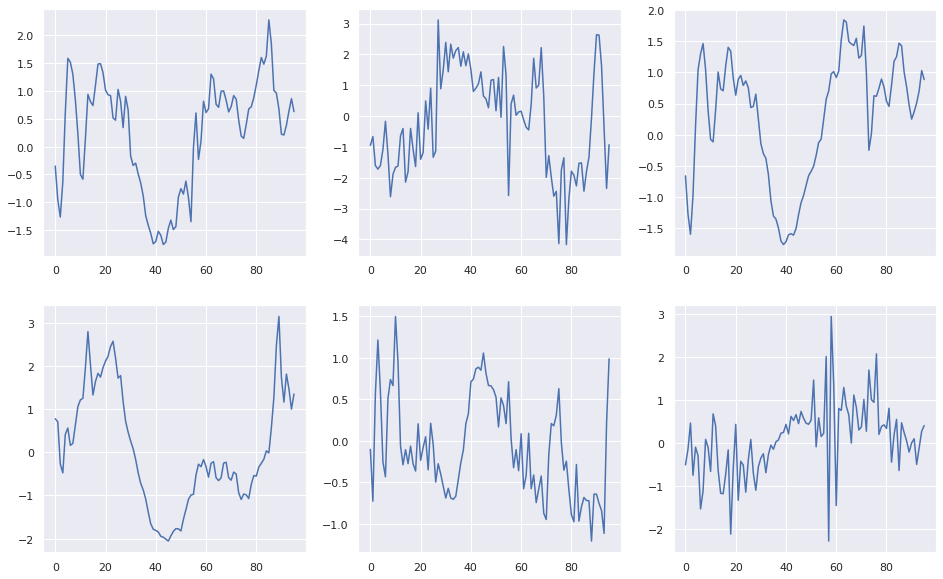

In [ ]:
fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(16, 10))
ax.plot(np.arange(0, len(mean_std_normal_train_df.iloc[0, 1:])), mean_std_normal_train_df.iloc[0, 1:])
ax1.plot(np.arange(0, len(mean_std_normal_train_df.iloc[1, 1:])), mean_std_normal_train_df.iloc[1, 1:])
ax2.plot(np.arange(0, len(mean_std_normal_train_df.iloc[2, 1:])), mean_std_normal_train_df.iloc[2, 1:])
ax3.plot(np.arange(0, len(mean_std_normal_train_df.iloc[3, 1:])), mean_std_normal_train_df.iloc[3, 1:])
ax4.plot(np.arange(0, len(mean_std_normal_train_df.iloc[4, 1:])), mean_std_normal_train_df.iloc[4, 1:])
ax5.plot(np.arange(0, len(mean_std_normal_train_df.iloc[5, 1:])), mean_std_normal_train_df.iloc[5, 1:])

## Splitting dataset

In [ ]:
Y_train = train_df.iloc[:, 0]
X_train = train_df.iloc[:, 1:]

In [ ]:
nb_classes = np.unique(Y_train)

In [ ]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,-0.197561,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
96,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,-1.288162,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
97,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,-0.241250,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
98,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,0.064901,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [ ]:
Y_train

0    -1
1     1
2    -1
3    -1
4     1
     ..
95    1
96   -1
97   -1
98    1
99    1
Name: 0, Length: 100, dtype: int64

In [ ]:
X_train.shape

(100, 96)

In [ ]:
Y_train.shape

(100,)

In [ ]:
print("x_train",X_train.shape)
print("Number of patients for train:",X_train.shape[0])
# print("Number of images for test:",X_test.shape[0])
# print("Size of an image:",X_train.shape[1:],"which makes:", X_train.shape[1]*X_train.shape[2],"pixels")
print("List of classes:",np.unique(Y_train))

x_train (100, 96)
Number of patients for train: 100
List of classes: [-1  1]


In [ ]:
Y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

## Define a function that transforms labels into binary representation for several classes

In [ ]:
def transform_labels(x_train, x_test, y_train, y_test):
  """
  This function transforms non-binary classes to a binary representation
  For example if we have a list of 6 flowers each can have one of the 3 classes
  Input: [
           1, 
           3,
           3,
           2,
           1,
           2
          ]
           
  Output: [
           [1,0,0], # class 1 
           [0,0,1], # class 3
           [0,0,1], # class 3
           [0,1,0], # class 2
           [1,0,0], # class 1
           [0,1,0]  # class 2
          ]
  """
  
  print('x_train', x_train.shape)
  print('x_test', x_test.shape)
  print('y_train', y_train.shape) 
  print('y_test', y_test.shape)

  # adding dimension, because x dimension is 2, should be at least 3
  x_train = x_train.to_numpy().reshape((x_train.shape[0],x_train.shape[1],1))
  x_test = x_test.to_numpy().reshape((x_test.shape[0],x_test.shape[1],1))

  # concatenate train and test sets 
  y_train_test = np.concatenate((y_train,y_test),axis=0)
  
  # initialize a Label encoder 
  encoder = LabelEncoder()
  # transform [1,3,3,2,1,2] to [0,2,2,1,0,1] 
  new_y_train_test = encoder.fit_transform(y_train_test)
  
  # initialize a one-hot encoder
  encoder = OneHotEncoder()
  # transform from [0,2,2,1,0,1] to binary representation
  new_y_train_test = encoder.fit_transform(new_y_train_test.reshape(-1,1))
  
  # split train/test sets
  new_y_train = new_y_train_test[0:len(y_train)]
  new_y_test = new_y_train_test[len(y_train):]
  
  print('new_y_train',new_y_train.shape) 
  print('new_y_test',new_y_test.shape) 
  
  # return sets in numpy array format
  return x_train, x_test, new_y_train.toarray(), new_y_test.toarray()   

In [ ]:
X_train, X_test, Y_train, Y_test = transform_labels(X_train, X_test, Y_train, Y_test)

x_train (100, 96)
x_test (100, 96)
y_train (100,)
y_test (100,)
new_y_train (100, 2)
new_y_test (100, 2)


# Data Analysis

## Normal Heartbeat signals

In [ ]:
normal = train_df[(train_df[0] == 1)]

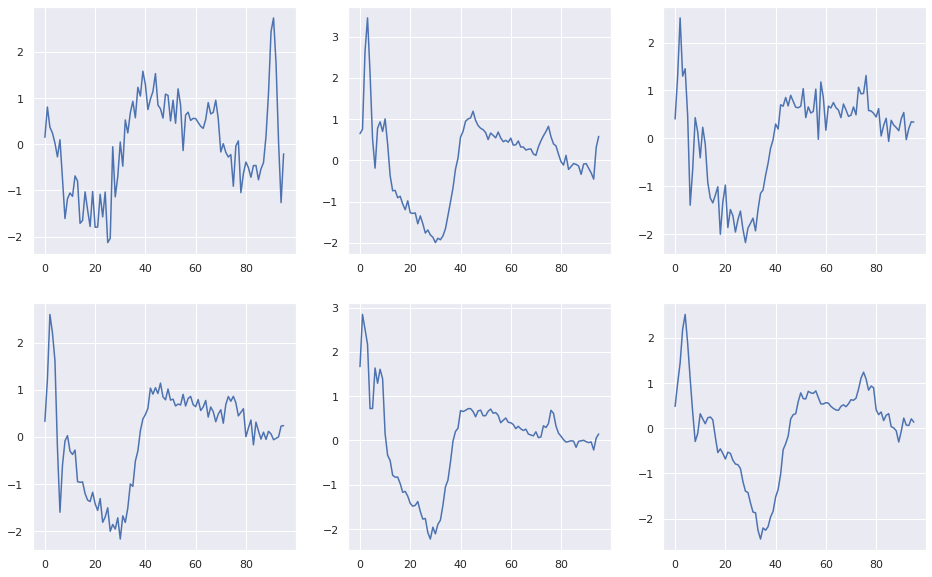

In [ ]:
fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(16, 10))
ax.plot(np.arange(0, len(normal.iloc[0, 1:])), normal.iloc[0, 1:])
ax1.plot(np.arange(0, len(normal.iloc[1, 1:])), normal.iloc[1, 1:])
ax2.plot(np.arange(0, len(normal.iloc[2, 1:])), normal.iloc[2, 1:])
ax3.plot(np.arange(0, len(normal.iloc[3, 1:])), normal.iloc[3, 1:])
ax4.plot(np.arange(0, len(normal.iloc[4, 1:])), normal.iloc[4, 1:])
ax5.plot(np.arange(0, len(normal.iloc[5, 1:])), normal.iloc[5, 1:])

## Myocardial Heartbeat signals

In [ ]:
myocardial = train_df[(train_df[0] == -1)]

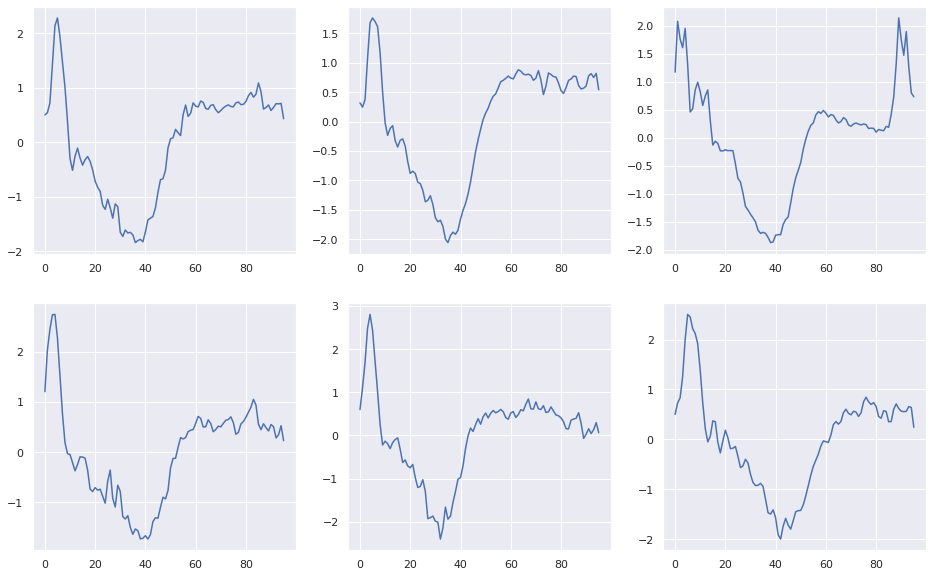

In [ ]:
fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(16, 10))
ax.plot(np.arange(0, len(myocardial.iloc[0, 1:])), myocardial.iloc[0, 1:])
ax1.plot(np.arange(0, len(myocardial.iloc[1, 1:])), myocardial.iloc[1, 1:])
ax2.plot(np.arange(0, len(myocardial.iloc[2, 1:])), myocardial.iloc[2, 1:])
ax3.plot(np.arange(0, len(myocardial.iloc[3, 1:])), myocardial.iloc[3, 1:])
ax4.plot(np.arange(0, len(myocardial.iloc[4, 1:])), myocardial.iloc[4, 1:])
ax5.plot(np.arange(0, len(myocardial.iloc[5, 1:])), myocardial.iloc[5, 1:])

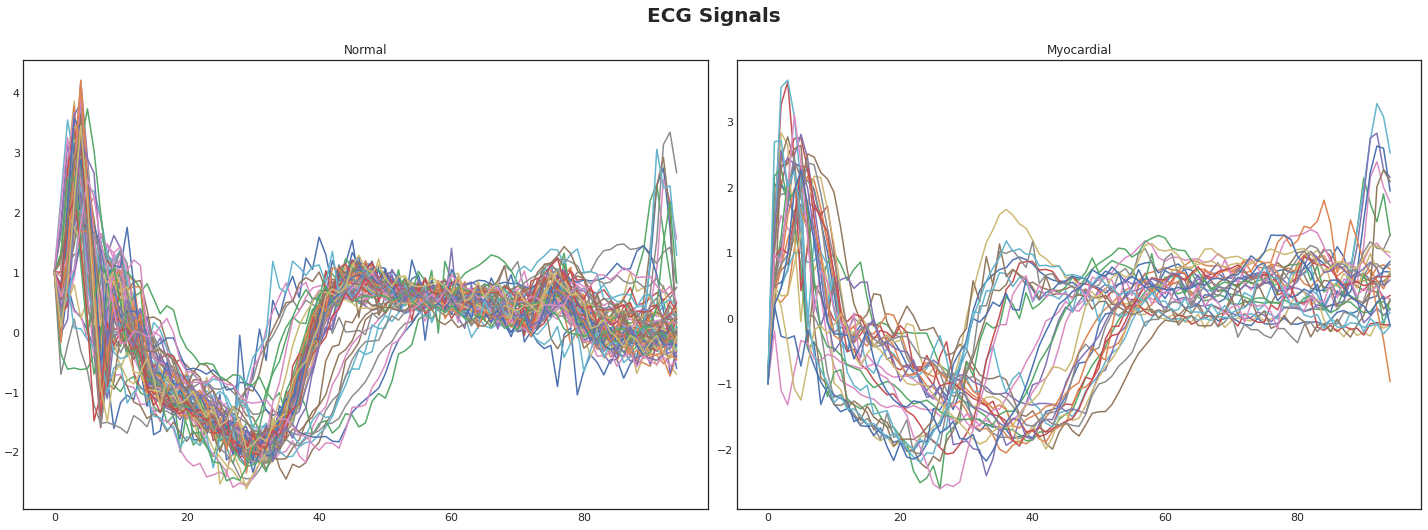

In [ ]:
with plt.style.context("seaborn-white"):
  fig, axs = plt.subplots(1, 2, figsize=(20, 7))
  ax = axs.flat[0]
  ax.plot(normal.values[:,:-2].transpose())
  ax.set_title('Normal')
  
  ax1 = axs.flat[1]
  ax1.plot(myocardial.values[:,:-2].transpose())
  ax1.set_title('Myocardial')

  plt.tight_layout()
  plt.suptitle("ECG Signals", fontsize=20, y=1.05, weight="bold")


# Model construction

In [ ]:
input_shape = X_train.shape[1:]
nb_classes = np.unique(Y_train)

## Neural Network

In [ ]:
class NN:
  def __init__(self, X_train, Y_train, X_test, Y_test):
    self.filters = 32
    self.kernel_size = 5
    self.padding = 'same'

    self.factor = 0.5
    self.patience = 5
    self.min_lr = 0.0001
    self.batch_size = 64
    self.epochs = 300
    self.validation_split = 0.2
    self.verbose = 0

    self.X_train = X_train
    self.Y_train = Y_train

    self.X_test = X_test
    self.Y_test = Y_test

    self.num_classes = np.unique(Y_train)
  
  def export_model_structure(self):
    print("-"*10 + " Model Structure Begin " + "-"*10)
    tf.keras.utils.plot_model(self.model, to_file='nn.pdf', show_shapes=True)
    print("-"*10 + " Model Structure End " + "-"*10)

  def show_model_summary(self):
    print("-"*10 + " Model Summary Begin " + "-"*10)
    print(self.model.summary())
    print("-"*10 + " Model Summary End " + "-"*10)

  def show_loss_graph(self):
    print("-"*10 + " Loss graph Begin " + "-"*10)
    history_dict = self.history.history
    loss_train_epochs = history_dict['loss']
    loss_val_epochs = history_dict['val_loss']

    plt.figure()
    plt.plot(loss_train_epochs, color='blue', label='train_loss')
    plt.plot(loss_val_epochs, color='red', label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.savefig('epoch-loss.pdf')
    plt.show()
    plt.close()
    print("-"*10 + " Loss graph End " + "-"*10)
    
  def show_accuracy_graph(self):
    print("-"*10 + " Accuracy graph Begin " + "-"*10)
    history_dict = self.history.history
    acc_train_epochs = history_dict['accuracy']
    acc_val_epochs = history_dict['val_accuracy']

    plt.figure()
    plt.plot(acc_train_epochs, color='blue', label='train_acc')
    plt.plot(acc_val_epochs, color='red', label='val_acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    plt.close()
    print("-"*10 + " Accuracy graph End " + "-"*10)

  def evaluate(self):
    print("-"*10 + " Evaluation Begin " + "-"*10)
    loss, acc = self.model.evaluate(self.X_train, self.Y_train, verbose=False)
    print("Accuracy on train:", acc)
    loss,acc = self.model.evaluate(self.X_test, self.Y_test, verbose=False)
    print("Accuracy on test:", acc) 
    print("-"*10 + " Evaluation End " + "-"*10)

## Convolutional Neural Network

In [ ]:
class CNN(NN):
  """ This architecture is a base CNN architecture """
  def base(self):
    keras.backend.clear_session()

    input_layer = keras.layers.Input(X_train.shape[1:])
    
    conv_1 = keras.layers.Conv1D(filters = 32, kernel_size = (3, ), activation = 'relu', padding = 'same')(input_layer)
    conv_2 = keras.layers.Conv1D(filters = 64, kernel_size = (3, ), activation = 'relu', padding = 'same')(conv_1) 
    conv_3 = keras.layers.Conv1D(filters = 128, kernel_size = (5, ), activation = 'relu', padding = 'same')(conv_2)
    pool_1 = keras.layers.MaxPooling1D(pool_size = (3, ), strides = 2, padding = 'same')(conv_3)
    
    dropout_1 = keras.layers.Dropout(0.5)(pool_1)

    flatenn_1 = keras.layers.Flatten()(dropout_1)

    dense_1 = keras.layers.Dense(units = 512, activation = 'relu')(flatenn_1)
    dense_2 = keras.layers.Dense(units = 1024, activation = 'relu')(dense_1)
    
    output_layer = keras.layers.Dense(units=2, activation='softmax')(dense_2)
    
    self.model = keras.models.Model(inputs=input_layer, outputs=output_layer)

  """ This architecture is a base CNN architecture with adding some regularization to avoid overfitting"""
  def base_with_regularization(self):
    keras.backend.clear_session()

    input_layer = keras.layers.Input(X_train.shape[1:])
    
    conv_1 = keras.layers.Conv1D(filters = 32, kernel_size = (3, ), activation = 'relu', padding = 'same')(input_layer)
    conv_2 = keras.layers.Conv1D(filters = 64, kernel_size = (3, ), activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.001), padding = 'same')(conv_1) 
    conv_3 = keras.layers.Conv1D(filters = 128, kernel_size = (5, ), activation = 'relu', padding = 'same')(conv_2)
    pool_1 = keras.layers.MaxPooling1D(pool_size = (3, ), strides = 2, padding = 'same')(conv_3)
    
    dropout_1 = keras.layers.Dropout(0.5)(pool_1)

    flatenn_1 = keras.layers.Flatten()(dropout_1)

    dense_1 = keras.layers.Dense(units = 512, activation = 'relu')(flatenn_1)
    dense_2 = keras.layers.Dense(units = 1024, activation = 'relu')(dense_1)
    
    output_layer = keras.layers.Dense(units=2, activation='softmax')(dense_2)
    
    self.model = keras.models.Model(inputs=input_layer, outputs=output_layer)

  """This method is used to train the model before evaluation"""
  def train(self):
    callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=self.factor, patience=self.patience, min_lr=self.min_lr)

    self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    self.history = self.model.fit(self.X_train, self.Y_train, batch_size=self.batch_size, epochs=self.epochs, verbose=self.verbose, validation_split=self.validation_split, callbacks=[callback])


### Base CNN

In [ ]:
cnn = CNN(X_train, Y_train, X_test, Y_test)

---------- Model Structure Begin ----------
---------- Model Structure End ----------
---------- Model Summary Begin ----------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 96, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           41088     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 128)          0         
 )                                                               
                                                                 

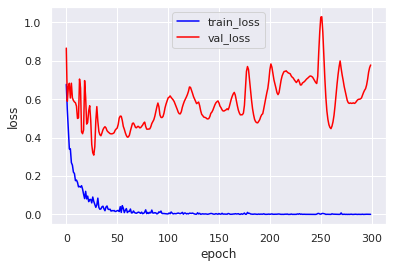

---------- Loss graph End ----------
---------- Accuracy graph Begin ----------


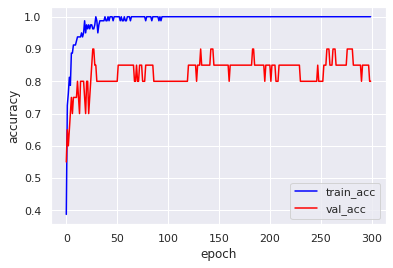

---------- Accuracy graph End ----------
---------- Evaluation Begin ----------
Accuracy on train: 0.9599999785423279
Accuracy on test: 0.8600000143051147
---------- Evaluation End ----------


In [ ]:
cnn.base()
cnn.export_model_structure()
cnn.show_model_summary()
cnn.train()
cnn.show_loss_graph()
cnn.show_accuracy_graph()
cnn.evaluate()

In [ ]:
Y_pred = cnn.model.predict(X_test, batch_size=300)

1/1 [==============================] - 0s 209ms/step


In [ ]:
print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        36
           1       0.87      0.97      0.92        64

    accuracy                           0.89       100
   macro avg       0.90      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(Y_test, Y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(Y_test, Y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(Y_test, Y_pred)))

ranking-based average precision : 0.945
Ranking loss : 0.110
Coverage_error : 1.110


### CNN + Regularization

In [ ]:
cnn1 = CNN(X_train, Y_train, X_test, Y_test)

---------- Model Structure Begin ----------
---------- Model Structure End ----------
---------- Model Summary Begin ----------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 96, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           41088     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 128)          0         
 )                                                               
                                                                 

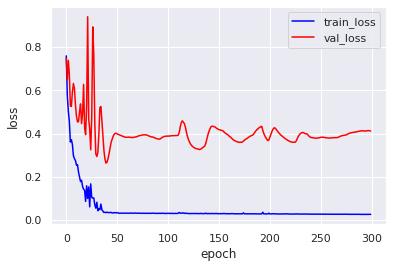

---------- Loss graph End ----------
---------- Accuracy graph Begin ----------


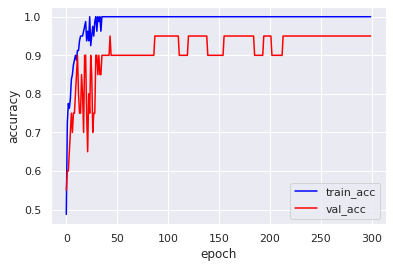

---------- Accuracy graph End ----------
---------- Evaluation Begin ----------
Accuracy on train: 0.9900000095367432
Accuracy on test: 0.8999999761581421
---------- Evaluation End ----------


In [ ]:
cnn1.base_with_regularization()
cnn1.export_model_structure()
cnn1.show_model_summary()
cnn1.train()
cnn1.show_loss_graph()
cnn1.show_accuracy_graph()
cnn1.evaluate()

In [ ]:
Y_pred = cnn.model.predict(X_test, batch_size=300)

1/1 [==============================] - 0s 57ms/step


In [ ]:
print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        36
           1       0.87      0.97      0.92        64

    accuracy                           0.89       100
   macro avg       0.90      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(Y_test, Y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(Y_test, Y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(Y_test, Y_pred)))

ranking-based average precision : 0.945
Ranking loss : 0.110
Coverage_error : 1.110


## Recurrent Neural Network

In [ ]:
class RNN(NN):
  def base_model_construction(self):
    # Define the input and output layers
    input_layer = tf.keras.layers.Input(shape=(96, 1))

    # Add multiple hidden layers
    hidden_layer_1 = tf.keras.layers.LSTM(64, return_sequences=True)(input_layer)
    hidden_layer_2 = tf.keras.layers.LSTM(64)(hidden_layer_1)
    hidden_layer_3 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer_2)

    output_layer = tf.keras.layers.Dense(2, activation='softmax')(hidden_layer_3)

    # Build the model
    self.model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

  def base_model_construction_with_regularization(self):
    # Define the input and output layers
    input_layer = tf.keras.layers.Input(shape=(96, 1))

    conv_1 = keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
    pool_1 = keras.layers.MaxPooling1D(pool_size=2)(conv_1)
    lstm_1 = keras.layers.LSTM(units=128)(pool_1)
    dropout_1 = keras.layers.Dropout(rate=0.5)(lstm_1)
    dense_1 = keras.layers.Dense(units=2, activation='softmax')(dropout_1)

    # Build the model
    self.model = tf.keras.Model(inputs=input_layer, outputs=dense_1)

  def train(self):
    callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=self.factor, patience=self.patience, min_lr=self.min_lr)

    self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    self.history = self.model.fit(self.X_train, self.Y_train, batch_size=self.batch_size, epochs=self.epochs, verbose=self.verbose, validation_split=self.validation_split, callbacks=[callback])

### Base RNN model

In [ ]:
rnn = RNN(X_train, Y_train, X_test, Y_test)

---------- Model Structure Begin ----------
---------- Model Structure End ----------
---------- Model Summary Begin ----------
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 96, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 54,210
Trainable params: 54,210
Non-trainable par

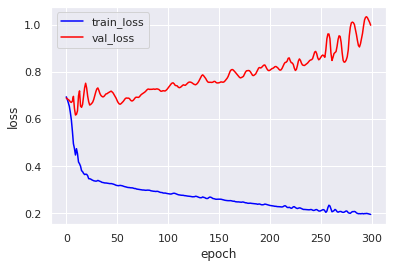

---------- Loss graph End ----------
---------- Accuracy graph Begin ----------


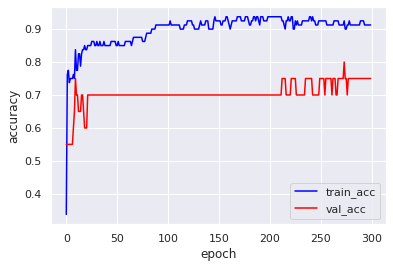

---------- Accuracy graph End ----------
---------- Evaluation Begin ----------
Accuracy on train: 0.8799999952316284
Accuracy on test: 0.75
---------- Evaluation End ----------


In [ ]:
rnn.base_model_construction()
rnn.export_model_structure()
rnn.show_model_summary()
rnn.train()
rnn.show_loss_graph()
rnn.show_accuracy_graph()
rnn.evaluate()

In [ ]:
Y_pred = cnn.model.predict(X_test, batch_size=300)

1/1 [==============================] - 0s 161ms/step


In [ ]:
print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77        36
           1       0.84      0.97      0.90        64

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [ ]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(Y_test, Y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(Y_test, Y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(Y_test, Y_pred)))

ranking-based average precision : 0.930
Ranking loss : 0.140
Coverage_error : 1.140


### RNN with Regularization

In [ ]:
# base_model_construction_with_regularization
rnn1 = RNN(X_train, Y_train, X_test, Y_test)

---------- Model Structure Begin ----------
---------- Model Structure End ----------
---------- Model Summary Begin ----------
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 94, 32)            128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 47, 32)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                               

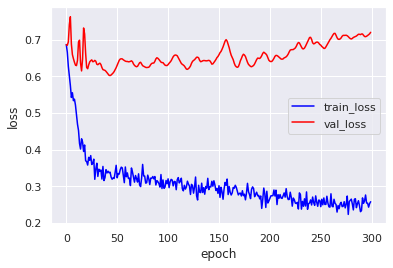

---------- Loss graph End ----------
---------- Accuracy graph Begin ----------


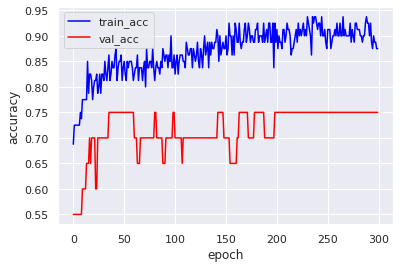

---------- Accuracy graph End ----------
---------- Evaluation Begin ----------
Accuracy on train: 0.8700000047683716
Accuracy on test: 0.7400000095367432
---------- Evaluation End ----------


In [ ]:
rnn1.base_model_construction_with_regularization()
rnn1.export_model_structure()
rnn1.show_model_summary()
rnn1.train()
rnn1.show_loss_graph()
rnn1.show_accuracy_graph()
rnn1.evaluate()

In [ ]:
Y_pred = cnn.model.predict(X_test, batch_size=300)

1/1 [==============================] - 0s 63ms/step


In [ ]:
print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77        36
           1       0.84      0.97      0.90        64

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [ ]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(Y_test, Y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(Y_test, Y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(Y_test, Y_pred)))

ranking-based average precision : 0.930
Ranking loss : 0.140
Coverage_error : 1.140
